**Kutu grafigi değişkenimizin dağılımını gösterir bize ve çeyrekler üzerine oluşturur.**

In [4]:
import seaborn as sns

In [5]:
veri=sns.load_dataset("diamonds")
veri=veri.select_dtypes(include=["float64","int64"]) #sayısal verilere erişmek için tip seçimi gerçekleşitiriyor
veri.dropna() #eksik değerleri silmek için
veri.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [6]:
table_veri=veri["table"]

In [7]:
table_veri.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<AxesSubplot:xlabel='table'>

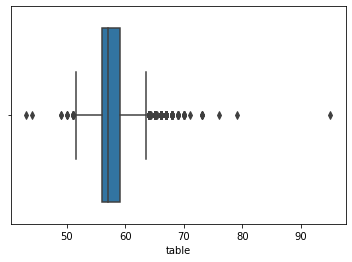

In [8]:
sns.boxplot(x=table_veri) #görseleştirmek için boxplot kullanılıyoruz

In [9]:
#eşik değer belirleniyor
Q1=table_veri.quantile(0.25)
Q3=table_veri.quantile(0.75)
IQR=Q3-Q1 # 1.çeyrek değerden 3.çeyrek değeri çıkardık


In [10]:
Q1

56.0

In [11]:
Q3

59.0

In [12]:
IQR

3.0

In [13]:
#Eşik değerler hesaplanıyor
alt_sinir=Q1-1.5*IQR 
ust_sinir=Q3+1.5*IQR

In [14]:
alt_sinir


51.5

In [15]:
ust_sinir

63.5

In [18]:
(table_veri<alt_sinir)|(table_veri>ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [21]:
aykiri_veri=(table_veri<alt_sinir)

In [22]:
aykiri_veri

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [23]:
table_veri[aykiri_veri] #fancy yardımıyla bulundu hangileri aykırı veriler olduğu çıktı

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [25]:
table_veri[aykiri_veri].index #indexlere erişmek içinse sonuna index konur

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')